In [112]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [113]:
students = pandas.read_csv('Course Fair Survey Data_for_SP19.csv')

In [1]:
# Stores a dictionary of studentIDs and the courses they selected
student_dict = {}

# Stores the name of the course
course_list = []

# Iterate through every student
for idx, student in students.iterrows():
    # Get the unique student id
    student_id = student['Unique ID']
    
    # Each student has chosen up to 5 classes to select
    # Extract the course code from the class name
    course_code1 = str(student['C1']).split()[0][:-1]
    course_code2 = str(student['C2']).split()[0][:-1]
    course_code3 = str(student['C3']).split()[0][:-1]
    course_code4 = str(student['C4']).split()[0][:-1]
    course_code5 = str(student['C5']).split()[0][:-1]
        
    # Construct the list of all 5 chosen courses
    all_courses = [course_code1, course_code2, course_code3, course_code4, course_code5]
    
    # Get rid of any na courses where people didn't fill out the box
    all_courses_no_empty = list(filter(lambda name: name != "na", all_courses))
    
    # Add the student and chosen classes to the dictionary
    student_dict[student_id] = all_courses_no_empty
    
    # Add the courses to the course_list if they are not there already
    course_list = list(set(course_list).union(set(all_courses_no_empty)))



NameError: name 'students' is not defined

In [115]:
# The adjacency matrix, with courses as vertices and edges indicating two classes were chosen by the same student
conflicts = np.zeros((len(course_list), len(course_list)))    

# For each student, if they want multiple courses, mark those points in the adjacency matrix
for student in student_dict:
    if len(student_dict[student]) > 1:
        classes_wanted = student_dict[student]
        
        # Get each unique pair of (different) courses taught
        for i in range(len(classes_wanted)):
            for j in range (i+1, len(classes_wanted)):
                # Get the name of the class that is wanted
                class1 = classes_wanted[i]
                class2 = classes_wanted[j]
                
                # Using the indices of the classes in course_list, update adjacency value
                conflicts[course_list.index(class1)][course_list.index(class2)] += 1
                conflicts[course_list.index(class2)][course_list.index(class1)] += 1
print(conflicts)

[[0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 5.]
 [3. 1. 0. ... 0. 5. 4.]]


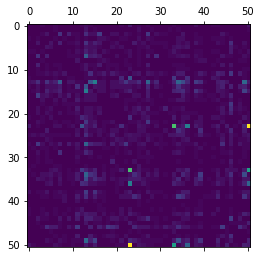

In [116]:
plt.matshow(conflicts)
plt.show()

['ENGR3600', 'ENGR2160', 'ENGR3420', 'ENGR3299A', 'ENGR3370', 'ENGR3392', 'AHSE2141/ENGR2141', 'ENGR2420', 'ENGR4290', 'ENGR3440', 'SCI1399', 'AHSE2199', 'MTH2210', 'ENGR2250', 'SCI2050', 'SCI1410', 'ENGR3430', 'ENGR3210', 'AHSE4190', 'AHSE2515', 'AHSE2199A', 'SCI1130', 'ENGR3531/MTH2131', 'AHSE1515', 'ENGR3345', 'AHSE2160/SCI1260', 'XYZ', 'ENGR3525', 'ENGR3290', 'ENGR2410', 'AHSE3190', 'AHSE2515A', 'AHSE3515', 'ENGR2510', 'MTH3120', 'MTH2188', 'ENGR2330', 'AHSE', 'SCI1230', 'ENGR2350', 'SUST3301', 'ENGR4599', 'AHSE2155', 'ENGR1330', 'ENGR3599', 'AHSE0112', 'ENGR4190', 'ENGR2199', 'ENGR3252', 'ENGR2320', 'CIE2019A']


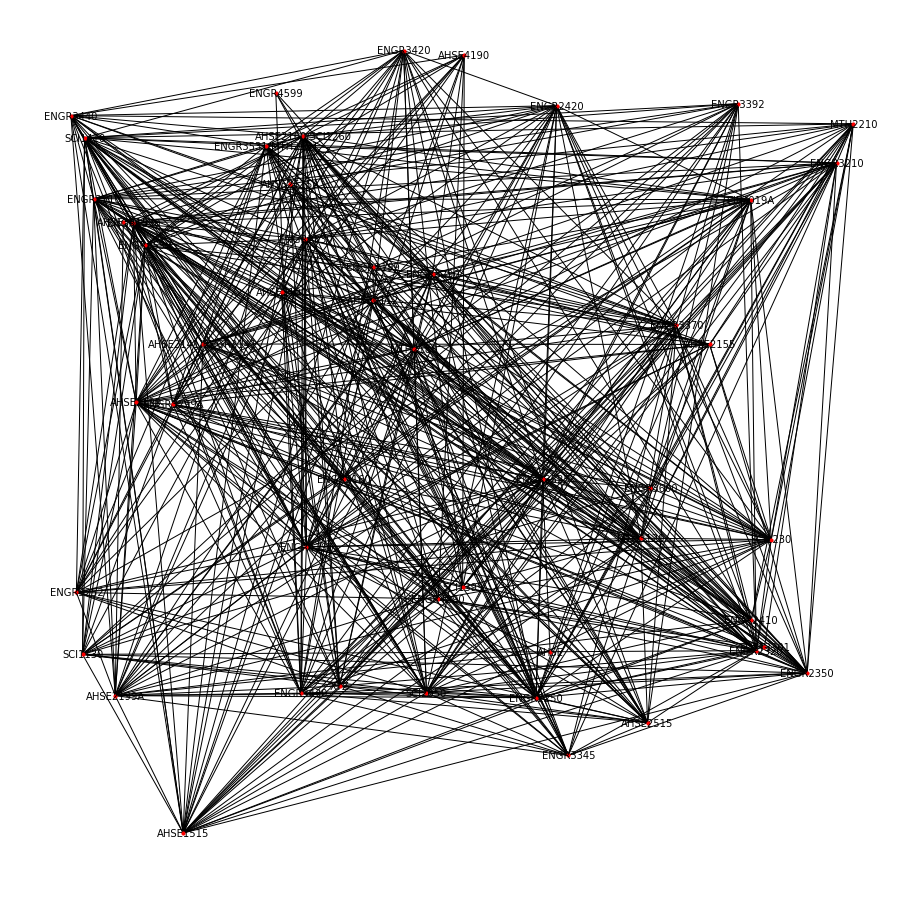

In [117]:
G = nx.from_numpy_matrix(conflicts)
mapping = {}
for idx, course in enumerate(course_list):
    mapping[idx] = course
# Label nodes from nu
G=nx.relabel_nodes(G,mapping)
print(G.nodes())
plt.figure(1,figsize=(12,12)) 
nx.draw(G, node_size=10, pos=nx.random_layout(G), with_labels=True, font_size=10)
plt.show()

In [118]:
print(G.degree())

[('ENGR3600', 14), ('ENGR2160', 8), ('ENGR3420', 23), ('ENGR3299A', 22), ('ENGR3370', 28), ('ENGR3392', 22), ('AHSE2141/ENGR2141', 26), ('ENGR2420', 26), ('ENGR4290', 13), ('ENGR3440', 22), ('SCI1399', 16), ('AHSE2199', 36), ('MTH2210', 21), ('ENGR2250', 40), ('SCI2050', 35), ('SCI1410', 33), ('ENGR3430', 26), ('ENGR3210', 26), ('AHSE4190', 13), ('AHSE2515', 25), ('AHSE2199A', 28), ('SCI1130', 20), ('ENGR3531/MTH2131', 27), ('AHSE1515', 30), ('ENGR3345', 22), ('AHSE2160/SCI1260', 42), ('XYZ', 23), ('ENGR3525', 36), ('ENGR3290', 22), ('ENGR2410', 20), ('AHSE3190', 14), ('AHSE2515A', 13), ('AHSE3515', 8), ('ENGR2510', 32), ('MTH3120', 33), ('MTH2188', 37), ('ENGR2330', 29), ('AHSE', 3), ('SCI1230', 31), ('ENGR2350', 31), ('SUST3301', 8), ('ENGR4599', 4), ('AHSE2155', 18), ('ENGR1330', 27), ('ENGR3599', 25), ('AHSE0112', 19), ('ENGR4190', 36), ('ENGR2199', 7), ('ENGR3252', 20), ('ENGR2320', 30), ('CIE2019A', 28)]


In [119]:
print(G['ENGR2160'])

{'AHSE2141/ENGR2141': {'weight': 1.0}, 'ENGR2250': {'weight': 3.0}, 'SCI1410': {'weight': 1.0}, 'AHSE2160/SCI1260': {'weight': 2.0}, 'ENGR3290': {'weight': 1.0}, 'AHSE3515': {'weight': 1.0}, 'MTH3120': {'weight': 1.0}, 'CIE2019A': {'weight': 1.0}}
